In [1]:
import mercury as mr # for widgets
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.image as mpimg


from PIL import Image

sns.set()

import time
import warnings
import pandas as pd
from itertools import cycle, islice

import numpy as np
import os


In [2]:
# Supporting functions
def closest(lst, K):
    # given a list of value "lst" and a target value "K", return the closest value in lst to K    
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
    

In [3]:
app = mr.App(title="3P Bending Simulation", description="Return the closest simulation result for the selected layer thickness")


mercury.App

# 3P Bending Simulation (ABAQUS)

### Return closest simulation retrun based on analytical results.

Add background information or introduction here.

In [4]:
# define thichness of each layer
layer1_thickness = np.array([0.3048, 0.362, 0.4191, 0.4762, 0.5334, 0.5911, 0.6477, 0.7049, 0.762]) #gelcoat
layer2_thickness = np.array([2.54, 2.62, 2.699, 2.778, 2.8575, 2.937, 3.016, 3.096, 3.175]) # (more important)
layer3_thickness = np.array([5.08, 5.715, 6.35])
layer4_thickness = np.array([2.54, 2.699, 2.8575, 3.016, 3.175])


### Usage

1. Select output field (Max Principal Stress, Total Strain, Plastic Strain, etc.)
2. Slide thickness of each layer.
3. Download results from the output widget.

In [6]:
# Select field variable
    
output_field = mr.Select(label="Select an output field", 
                              choices=["Max Principal Stress", "Max Principal Strain", "Max Principal Plastic Strain"],
                              url_key="output_field")

img_folder = (output_field.value).replace(" ","")

            

mercury.Select

# Layer Thickness
### Select, Type or Slide the thickness of each layer. Built multiple actions for demo.


In [7]:
ly1_select_temp = mr.Numeric(value=0.3048, label="Gel coat (layer 1) thickness (unit: mm) (between 0.3048 and 0.762)", step=0.01)
ly1_select = ly1_select_temp.value

ly2_select = mr.Numeric(value=2.54, label="PTMEG 1000 A (layer 2) thickness (unit: mm) (between 2.54 and 3.175)", step=0.01).value

ly3_select = mr.Numeric(value=5.08, label="Foam (layer 3) thickness (unit: mm) (between 5.08 and 6.35)", step=0.01).value

ly4_select = mr.Numeric(value=2.54, label="Alphagard 7.5 (layer 4) thickness (unit: mm) (between 2.54 and 3.175)", step=0.01).value

# find closest simulation and return picture

ly1_f = closest(layer1_thickness, ly1_select)
ly2_f = closest(layer2_thickness, ly2_select)
ly3_f = closest(layer3_thickness, ly3_select)
ly4_f = closest(layer4_thickness, ly4_select)

job_name = 'Job-'+'ly1t-'+str(ly1_f).replace('.', '') +'ly2t-'+str(ly2_f).replace('.', '') + \
                    'ly3t-'+str(ly3_f).replace('.', '') +'ly4t-'+str(ly4_f).replace('.', '')

img_name = job_name + '.png'
img_path = img_folder + '\\' + job_name + '.tif'

# plot reaction curve
curve_name = 'LoadForceCurve\\' + job_name + '.rpt'
rf_curve = pd.read_fwf(curve_name, delimiter=' ')
rf_curve = rf_curve.rename(columns={'_temp_1': 'reaction_force'})
rf_curve['X'] = rf_curve['X']*24.5
rf_curve['reaction_force'] = rf_curve['reaction_force']*(-1)*25.4  # 1 inch width

mercury.Numeric

mercury.Numeric

mercury.Numeric

mercury.Numeric

### Field plot

(-0.5, 1130.5, 616.5, -0.5)

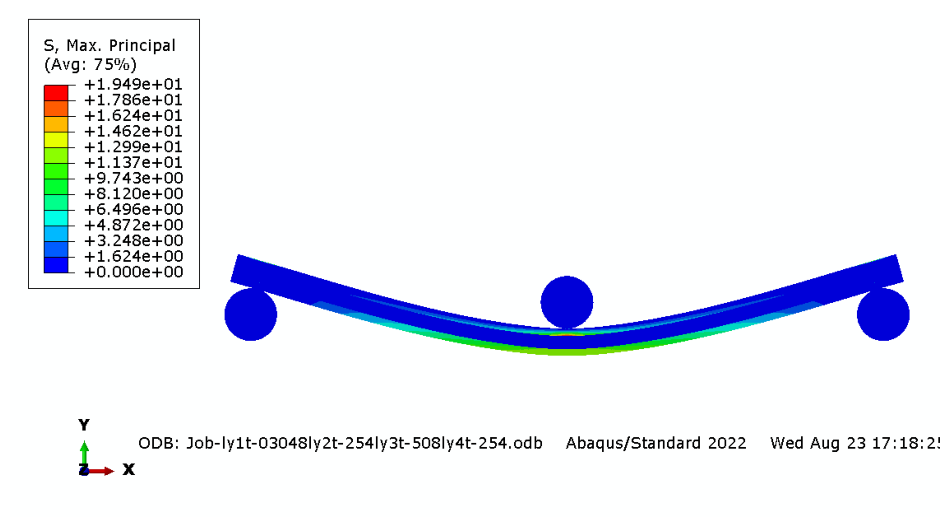

In [8]:
# Generate field plot
fig = plt.figure(figsize=(12,9))
img = Image.open(img_path) 
# plt.imshow(img)
plt.imshow(img)
plt.axis('off')


### Reaction curve (1 inch width)
##### (Vertical displacement - reaction force curve)

In [ ]:
plt.style.use('default')

fig2, axs= plt.subplots(1,2,figsize=(15, 5))
plt.axis('off')

# Plot vertical reaction curve
axs[0].plot(rf_curve['X'], rf_curve['reaction_force'] )
axs[0].set_title('Vertical displacement - reaction force (N)')
axs[0].set_xlabel('Vertical displacement (mm)')
axs[0].set_ylabel('Vertical reaction force (N)')
axs[0].set_facecolor('none')
axs[0].tick_params(axis='both', which='both', labelsize=12, labelbottom=True)
axs[0].axis('on')
axs[0].set_ylim(ymin=0)
axs[0].set_xlim(xmin=0)

axs[1].axis('off')
# axs[2].axis('off')

In [10]:
# Save output images

mr_output_dir = mr.OutputDir()

output_path = 'output' + '\\' + img_folder + '-' + job_name + 'field' + '.png'
output_path2 = 'output' + '\\' + job_name + 'curve' + '.png'

save_button = mr.Button(label="Save ouput image", style="primary")
if save_button.clicked:
    print("Output is saved to: " + output_path)
    fig.savefig(output_path, dpi=300)
    fig2.savefig(output_path2, dpi=300)






mercury.OutputDir

mercury.Button